In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

# Importing necessary libraries

In [ ]:
import matplotlib.pyplot as plt  
import numpy as np
import os                        
import shutil                    
from tensorflow import keras
import seaborn as sns
import random
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1.Data collection & exploration

The datasets used in the project were discovered and collected using the information from an open source eye disease database.Three datasets (Drishti Rim-One and Acrima datasets) had fundus photographies which present glaucoma.


In [ ]:
current_dir = os.getcwd()
print(current_dir)

/content


#1.1  DRISTHI
>The dataset comprises of 101 retinal fundus images with 31 normal images and 70 glaucomatous images acquired using a retinal fundus camera. The ground truth for comparison of implemented approaches comprises of the ‘normal/abnormal’ labels and soft segmented maps of ‘disc/cup’ generated by the researchers of the IIIT Hyderabad in alliance with Aravind eye hospital in Madurai, India. It also includes a .txt file for each retinal image comprising of CDR values, which is a significant diagnostic parameter for glaucoma. Further, the images in the data repository are gathered from people of varying age groups visiting the hospital, with images acquired under varying brightness and contrast.
Link to dataset: (https://cvit.iiit.ac.in/projects/mip/drishti-gs/mip-dataset2/Home.php)

In [ ]:
dristhi_dir = current_dir + '/drive/MyDrive/datasets/Dristhi/'
train_glaucoma_dir = dristhi_dir + "Training/Images/GLAUCOMA"
train_normal_dir = dristhi_dir + "Training/Images/NORMAL"
test_glaucoma_dir = dristhi_dir + "Test/Images/glaucoma"
test_normal_dir = dristhi_dir + "Test/Images/normal"
dristhi_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
dristhi_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Dristhi dataset contains :")
print(f"\t{len(dristhi_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(dristhi_normal_images)} images representing a normal eye")


Sample Dristhi glaucoma images:


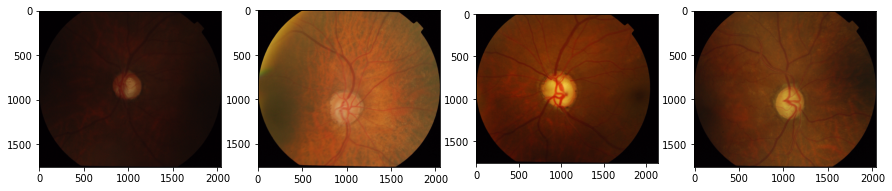


Sample Dristhi normal images:


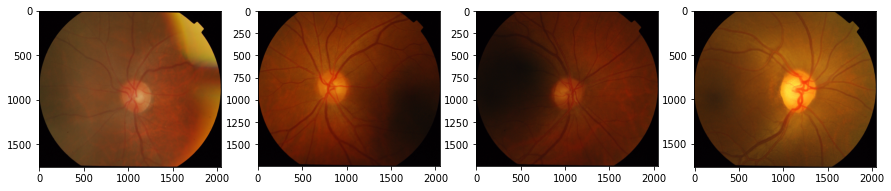

In [ ]:
print("Sample Dristhi glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, dristhi_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Dristhi normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, dristhi_normal_images[i - 1])}"))
plt.show()

# 1.2 Rim-One

>The RIM-ONE DL image dataset consists of 313 retinographies from normal subjects and 172 retinographies from patients with glaucoma. These images were captured in three Spanish hospitals: Hospital Universitario de Canarias (HUC), in Tenerife, Hospital Universitario Miguel Servet (HUMS), in Zaragoza, and Hospital Clínico Universitario San Carlos (HCSC), in Madrid.

>This dataset has been divided into training and test sets, with two variants:
* Partitioned randomly: the training and test sets are built randomly from all the images of the dataset.
* Partitioned by hospital: the images taken in the HUC are used for the training set, while the images taken in the HUMS and HCSC are used for testing.

In [ ]:
rimOne_dir = current_dir + '/drive/MyDrive/datasets/RIM-ONE_DL_images/partitioned_randomly/'
train_glaucoma_dir = rimOne_dir + "training_set/glaucoma"
train_normal_dir = rimOne_dir + "training_set/normal"
test_glaucoma_dir = rimOne_dir + "test_set/glaucoma"
test_normal_dir = rimOne_dir + "test_set/normal"
rimOne_glaucoma_images = os.listdir(train_glaucoma_dir)+os.listdir(test_glaucoma_dir)
rimOne_normal_images = os.listdir(train_normal_dir)+os.listdir(test_normal_dir)

# Look at the number of samples in each dataset
print("Rim One dataset contains :")
print(f"\t{len(rimOne_glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(rimOne_normal_images)} images representing a normal eye")


Rim One dataset contains :
	172 images representing an eye with glaucoma
	313 images representing a normal eye


Sample Rim-One glaucoma images:


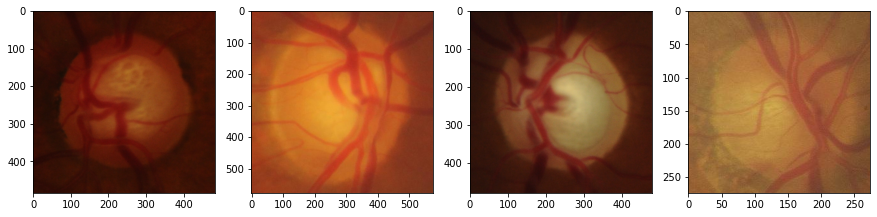


Sample Rim-One normal images:


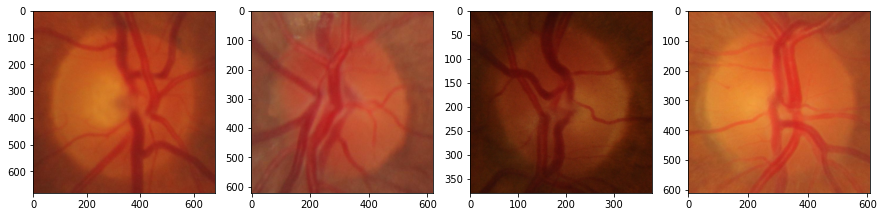

In [ ]:
print("Sample Rim-One glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_glaucoma_dir, rimOne_glaucoma_images[i - 1])}"))
plt.show()

print("\nSample Rim-One normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(train_normal_dir, rimOne_normal_images[i - 1])}"))
plt.show()

# 1.3. ACRIMA dataset 
* Country: Spain
* No. of patients: unknown
* No. of images: 705
* Diseases present: Glaucoma and healthy eyes
* Instrument used: TRC retina camera (Topcon, Japan)
* Image format: JPEG

>ACRIMA database is composed by 705 fundus images (396 glaucomatous and 309 normal images). They were collected at the FISABIO Oftalmología Médica in Valencia, Spain, from glaucomatous and normal patients with their previous consent and in accordance with the ethical standards laid down in the 1964 Declaration of Helsinki. All images from ACRIMA database were annotated by glaucoma experts with several years of experience. They were cropped around the optic disc and renamed.



>The image name has the following structure: First, the name starts with the two letters "Im", followed by an image number composed by three digits (starting from 001 until 705), followed by the label (this label is "g" if the image is pathological and "_" if the image is normal). Finally, all image names have the database name, "ACRIMA", at the end of their names. For example, a name for a glaucomatous image is "Im686_g_ACRIMA" and "Im001_ACRIMA" for a normal image.

In [ ]:
acrima_dir = current_dir + "/drive/MyDrive/datasets/acrima/Database"
glaucoma_dir = acrima_dir + "/glaucoma"
normal_dir = acrima_dir + "/normal"

normal_images = os.listdir(normal_dir)
glaucoma_images = os.listdir(glaucoma_dir)

# Look at the number of samples in each dataset
print("Acrima dataset contains : ")
print(f"\t{len(glaucoma_images)} images representing an eye with glaucoma")
print(f"\t{len(normal_images)} images representing a normal eye")

Acrima dataset contains : 
	396 images representing an eye with glaucoma
	309 images representing a normal eye


Sample glaucoma images:


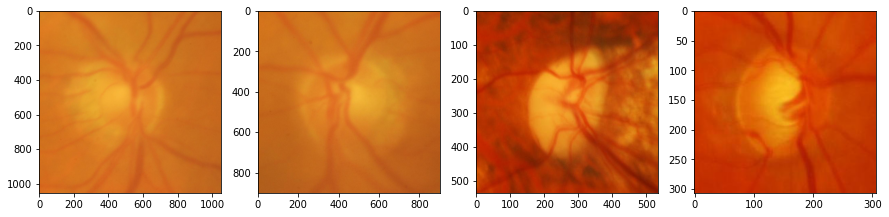


Sample normal images:


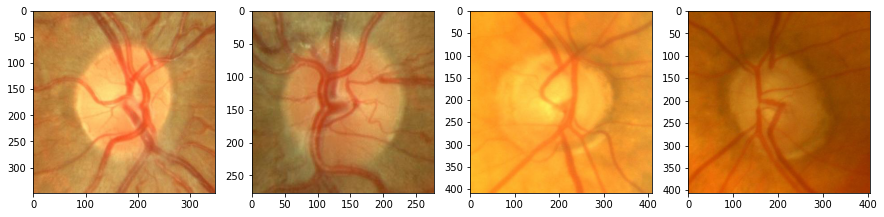

In [ ]:
print("Sample glaucoma images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(glaucoma_dir, glaucoma_images[i - 1])}"))
plt.show()

print("\nSample normal images:")
plt.subplots(figsize=(15, 10))
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.imshow(load_img(f"{os.path.join(normal_dir, normal_images[i - 1])}"))
plt.show()

Combining datasets

In [ ]:
os.mkdir('/content/combine')
## define your paths for glaucoma####
g_path1 = '/content/drive/MyDrive/datasets/acrima/Database/glaucoma'
g_path2 = '/content/drive/MyDrive/datasets/RIM-ONE_DL_images/partitioned_randomly/training_set/glaucoma'
g_path3 ='/content/drive/MyDrive/datasets/RIM-ONE_DL_images/partitioned_randomly/test_set/glaucoma'
g_path4='/content/drive/MyDrive/datasets/Dristhi/Training/Images/GLAUCOMA'
g_path5='/content/drive/MyDrive/datasets/Dristhi/Test/Images/glaucoma'
g_dest='/content/drive/combine/glaucoma'

os.mkdir(g_dest)
g_list=[g_path1,g_path2,g_path3,g_path4,g_path5]

for i in g_list:
  shutil.copytree(i, g_dest, dirs_exist_ok=True)
print(len(os.listdir('/content/drive/combine/glaucoma')))

##################################################
#normal
n_path1='/content/drive/MyDrive/datasets/acrima/Database/normal'
n_path2='/content/drive/MyDrive/datasets/RIM-ONE_DL_images/partitioned_randomly/training_set/normal'
n_path3='/content/drive/MyDrive/datasets/RIM-ONE_DL_images/partitioned_randomly/test_set/normal'
n_path4='/content/drive/MyDrive/datasets/Dristhi/Training/Images/NORMAL'
n_path5='/content/drive/MyDrive/datasets/Dristhi/Test/Images/normal'
n_dest='/content/combine/drive/normal'
os.mkdir(n_dest)
n_list=[n_path1,n_path2,n_path3,n_path4,n_path5]

for i in n_list:
  shutil.copytree(i,n_dest, dirs_exist_ok=True)
print(len(os.listdir(n_dest)))

# Combined

In [ ]:
base_dir = '/content/drive/MyDrive/datasets/combine'
base_dir = pathlib.Path(base_dir)

glaucoma = [fn for fn in os.listdir(f'/content/drive/MyDrive/datasets/combine/glaucoma/')]
normal = [fn for fn in os.listdir(f'/content/drive/MyDrive/datasets/combine/normal')]
data=[glaucoma,normal]
dataset_classes =['glaucoma','normal']

image_count = len(list(base_dir.glob('*/*.jpg')))+len(list(base_dir.glob('*/*.png')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(dataset_classes)}')
count = 0
data_count = []
for x in dataset_classes:
  print(f'Total {x} images: {len(data[count])}')
  data_count.append(len(data[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=dataset_classes, y=data_count)
plt.show()

Spliiting Ratio of Dataset 80:10:10 (Train:Test:Validation)



In [ ]:
!pip install split-folders 
import splitfolders #to split dataset
import pathlib
base_ds = '/content/drive/MyDrive/datasets/combine'
base_ds = pathlib.Path(base_ds)
img_height=256
img_width=256
batch_size=32
splitfolders.ratio(base_ds, output='images', seed=1321, ratio=(.8,.1,.1), group_prefix=None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 1291 files [00:28, 45.37 files/s] 


Data augmentation done using Image Data Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
shear_range = 0.15,
zoom_range = 0.15,
horizontal_flip = True)
train_ds = datagen.flow_from_directory(
    'images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

val_ds = datagen.flow_from_directory(
    'images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

test_ds = datagen.flow_from_directory(
    'images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 1032 images belonging to 2 classes.
Found 128 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


## CNN MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.layers import BatchNormalization

# Initialising the CNN
classifier = Sequential()
# Step 1 - Adding Convolution layer
classifier.add(Conv2D(32, (3, 3), input_shape = (256,256, 3), activation = 'relu'))

# Step 2 - Adding MaxPooling layers
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu'))
classifier.add(BatchNormalization()),
classifier.add(Dense(256,activation='relu')),
classifier.add(Dropout(0.25)),
classifier.add(Dense(units = 2, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 512)               6

In [ ]:
model_info=classifier.fit(train_ds,
steps_per_epoch = int(round(1032/32)),
epochs = 150,
validation_data = val_ds,
validation_steps = int(round(128/32)))

Epoch 1/150
32/32 [==============================] - 122s 4s/step - loss: 0.3388 - accuracy: 0.8570 - val_loss: 0.3747 - val_accuracy: 0.8438
Epoch 2/150
32/32 [==============================] - 121s 4s/step - loss: 0.3684 - accuracy: 0.8330 - val_loss: 0.4293 - val_accuracy: 0.8125
Epoch 3/150
32/32 [==============================] - 129s 4s/step - loss: 0.3158 - accuracy: 0.8600 - val_loss: 0.6963 - val_accuracy: 0.7422
Epoch 4/150
32/32 [==============================] - 120s 4s/step - loss: 0.3777 - accuracy: 0.8280 - val_loss: 0.4642 - val_accuracy: 0.7969
Epoch 5/150
32/32 [==============================] - 126s 4s/step - loss: 0.3127 - accuracy: 0.8580 - val_loss: 0.4395 - val_accuracy: 0.8281
Epoch 6/150
32/32 [==============================] - 120s 4s/step - loss: 0.2991 - accuracy: 0.8610 - val_loss: 0.2916 - val_accuracy: 0.8750
Epoch 7/150
32/32 [==============================] - 124s 4s/step - loss: 0.3201 - accuracy: 0.8520 - val_loss: 0.3455 - val_accuracy: 0.8516
Epoch 

In [ ]:
classifier.save('/content/drive/MyDrive/datasets/combine_model/combine_cnn.h5')

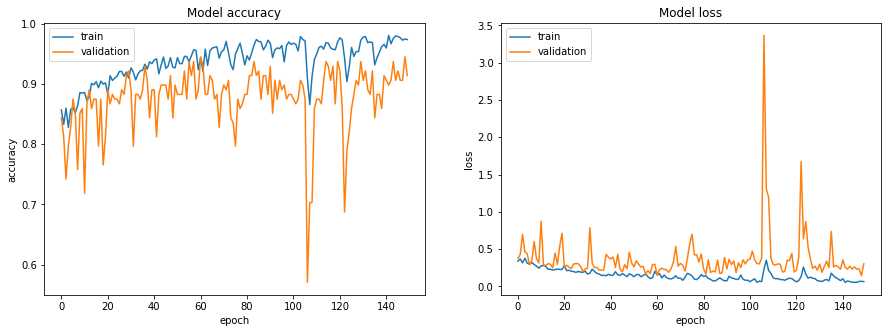

In [ ]:
def plot_train_history(history):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_train_history(model_info)

Loading Model 

In [ ]:
model=load_model('/content/drive/MyDrive/datasets/combine_model/combine_cnn.h5')
print("Glaucoma detection model loaded")

Glaucoma detection model loaded


In [ ]:
def glaucoma_prediction(test_image):
  image = img_to_array(test_image)
  image = np.expand_dims(image, axis = 0)
  result = np.argmax(model.predict(image))
  return result

In [ ]:
test_image = load_img('/content/drive/MyDrive/datasets/acrima/Database/glaucoma/Im310_g_ACRIMA.jpg', target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 387ms/step
Glaucoma


In [ ]:
test_image = load_img('/content/drive/MyDrive//datasets/acrima/Database/normal/Im001_ACRIMA.jpg', target_size = (256,256))
prediction = glaucoma_prediction(test_image)
if prediction == 0:
 print("Glaucoma")
else:
 print("Not Glaucoma")

1/1 [==============================] - 0s 292ms/step
Not Glaucoma


# Model Accuracy

In [ ]:
score=model.evaluate(test_ds)
print("Loss:",score[0],"Accuracy:",score[1])

5/5 [==============================] - 9s 2s/step - loss: 0.0830 - accuracy: 0.9695
Loss: 0.08299229294061661 Accuracy: 0.9694656729698181


Testing set confusion matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sb

In [ ]:
pred= np.round(model.predict(test_ds, verbose=1))
test_labels=test_ds.labels
test_pred_labels=[]
for i in range(len(pred)):
  test_pred_labels.append(np.argmax(pred[i]))
conf_matrix= confusion_matrix(test_pred_labels,test_labels)
print (conf_matrix)

5/5 [==============================] - 6s 1s/step
[[64  1]
 [ 1 65]]


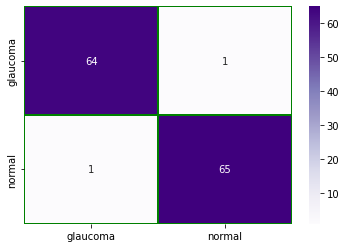

In [ ]:
sb.heatmap(conf_matrix,cmap='Purples', annot=True,xticklabels=['glaucoma','normal'],yticklabels=['glaucoma','normal'],linewidths=1,
                linecolor='green').plot()
plt.show()

In [ ]:
test_report = classification_report(test_ds.labels,test_pred_labels, target_names=['glaucoma','normal'], output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df

,precision,recall,f1-score,support
glaucoma,0.984615,0.984615,0.984615,65.000000
normal,0.984848,0.984848,0.984848,66.000000
accuracy,0.984733,0.984733,0.984733,0.984733
macro avg,0.984732,0.984732,0.984732,131.000000
weighted avg,0.984733,0.984733,0.984733,131.000000
